In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,LSTM
from keras.optimizers import Adam,RMSprop
import datetime as dt
import math

In [12]:
df1 = pd.read_csv('month1.csv')
df2 = pd.read_csv('month2.csv')
df3 = pd.read_csv('month3.csv')
df4 = pd.read_csv('month4.csv')
df5 = pd.read_csv('month5.csv')
df6 = pd.read_csv('month6.csv')
df7 = pd.read_csv('month7.csv')
df8 = pd.read_csv('month8.csv')
df9 = pd.read_csv('month9.csv')
df10 = pd.read_csv('month10.csv')
df11 = pd.read_csv('month11.csv')
df12 = pd.read_csv('month12.csv')

In [13]:
dates=[]
buildiing_numbers=[]
apartment_numbers=[]
hourly_readings = []

for x in df12.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])

for x in df2.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])
    
for x in df3.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])

for x in df4.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])
    
for x in df5.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])
    
for x in df6.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])
    
for x in df7.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])
    
for x in df8.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])
    
for x in df11.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])
    
for x in df1.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])
    
for x in df9.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])
    
for x in df10.values:
    dates.append(x[0])
    buildiing_numbers.append(x[1])
    apartment_numbers.append(x[2])
    hourly_readings.append(x[3:])

In [14]:
newdates=[]

for date in dates:
    try:
        new = dt.datetime.strptime(date,"%Y-%m-%d")
    except:
        a = date.split("-")
        newdate = "20"+str(a[2])+"-"+str(a[1])+"-"+str(a[0])
        new = dt.datetime.strptime(newdate,"%Y-%m-%d")
            
    newdates.append(new.timetuple().tm_yday)
    
dates =  newdates

########

new_appartments = {'???': 18, 'EL1': 19, 'EL2': 18, 'EL3': 11, 'EL4': 18, 'EL5': 12, 'EL6': 19}
flats = []
for x in apartment_numbers:
    try:
        int(x)
        flats.append(x)
    except: 
        if x not in new_appartments:
            new_appartments.update({x:np.random.randint(10,20)})
        flats.append(new_appartments[x])
        
apartment_numbers = flats

######

data = {'Date':dates, 'building_number':buildiing_numbers, "apartment_numbers":apartment_numbers,"hourly_readings":hourly_readings}

######

df = pd.DataFrame(data)

df = df.sample(frac=1)
dataset = df.values

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

100294 49400


In [15]:
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in dataset[:,0:3]:
        dataX.append(i)
    for i in dataset[:,3]:
        dataY.append([float(x)for x in i]) 
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

In [16]:
adam = Adam(lr = 0.001)
def build_model():
    model = Sequential()
    model.add(Dense(10, input_dim=(3), activation='relu'))
    # model.add(Dense(16,activation='relu'))
    model.add(Dense(24))
    model.compile(loss='mean_squared_error', optimizer=adam,metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

In [17]:
# x_val = trainX[:2358]
# partial_x_train = trainX[2358:]
# y_val = trainY[:2358]
# partial_y_train = trainY[2358:]

# k = 4
# num_val_samples = len(train) // k
# num_epochs = 15
# all_scores = []
# model = build_model()

# for i in range(k):
#     print('processing fold #', i)
#     val_data = trainX[i * num_val_samples: (i + 1) * num_val_samples]
#     val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]
#     partial_x_train = np.concatenate(
#         [trainX[:i * num_val_samples],
#         trainX[(i + 1) * num_val_samples:]],
#         axis=0)
#     partial_y_train = np.concatenate(
#         [trainY[:i * num_val_samples],
#         trainY[(i + 1) * num_val_samples:]],
#         axis=0)
    
#     model.fit(partial_x_train, partial_y_train, epochs=num_epochs, batch_size=200, verbose=0,validation_data=(val_data, val_targets))
# trainScore = model.evaluate(partial_x_train, partial_y_train, verbose=0)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
# testScore = model.evaluate(testX, testY, verbose=0)
# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    


Epoch 1/4
100294/100294 [==============================] - 3s 35us/step - loss: 1899.1848 - mean_squared_error: 1899.1848 - mean_absolute_error: 12.2024 - mean_absolute_percentage_error: 1834069020.0334 - cosine_proximity: -0.0623
Epoch 2/4
100294/100294 [==============================] - 3s 29us/step - loss: 20.3196 - mean_squared_error: 20.3196 - mean_absolute_error: 2.0630 - mean_absolute_percentage_error: 303511470.3213 - cosine_proximity: -0.2310
Epoch 3/4
100294/100294 [==============================] - 3s 28us/step - loss: 12.8949 - mean_squared_error: 12.8949 - mean_absolute_error: 1.1028 - mean_absolute_percentage_error: 160883351.0415 - cosine_proximity: -0.4145
Epoch 4/4
100294/100294 [==============================] - 3s 30us/step - loss: 11.6261 - mean_squared_error: 11.6261 - mean_absolute_error: 0.8775 - mean_absolute_percentage_error: 129894731.7085 - cosine_proximity: -0.5114


AttributeError: module 'matplotlib.pyplot' has no attribute 'legands'

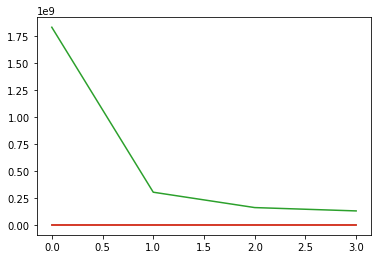

In [24]:
# # create and fit Multilayer Perceptron model

model = build_model()
history  =model.fit(trainX, trainY, epochs=4, batch_size=100, verbose=1)

# plot metrics
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['cosine_proximity'])
plt.legands()
plt.show()


# Estimate model performance
# trainScore = model.evaluate(trainX, trainY, verbose=0)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
# testScore = model.evaluate(testX, testY, verbose=0)
# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

In [25]:
math.sqrt(20.3196)

4.507726699790039

In [26]:
# put any 2 ranges points and compare models predictions from orignals
for index in range(1111,1122):
    test = np.expand_dims(testX[index],axis=0)
    predict = model.predict(test)[0]
    prediction =[]
    for x in predict:
        if x < 0:
            prediction.append(0)
        else:
            prediction.append(x)
    # print(prediction)
    # testY[index]
    print("%.2f"%math.fsum(prediction),"%.2f"%math.fsum(testY[index]))

25.50 11.20
10.47 12.40
29.11 8.40
11.36 22.10
11.97 5.20
11.53 16.00
15.71 11.40
10.50 5.50
11.14 2.70
11.09 6.40
10.99 10.70


In [9]:
# model.save('model_final.h5')

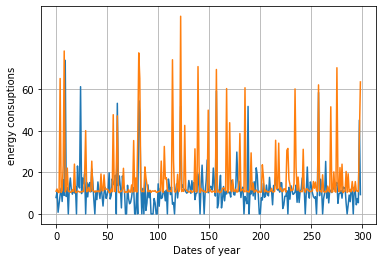

In [28]:
i = []
j = []
# for index in range(136,192):
for index in range(1,300):
    test = np.expand_dims(testX[index],axis=0)
    predict = model.predict(test)[0]
    prediction =[]
    for x in predict:
        if x < 0:
            prediction.append(0)
        else:
            prediction.append(x)
    i.append(float("%.2f"%math.fsum(prediction)))
    j.append(float("%.2f"%math.fsum(testY[index])))


import matplotlib.pyplot as plt
plt.plot(range(len(j)),j)
plt.plot(i)
plt.yticks(range(0,int(max(j)) ,20))
plt.xlabel('Dates of year ')
plt.ylabel('energy consuptions')
plt.grid()
plt.show()